#### Useful Information

- A Vicon motion capture camera system was used to record 12 users performing 5 hand postures with markers attached to a left-handed glove
- Marker Positions - Back of the glove and on all fingers 3 in thumb and 2 in others.Back of the Glove - identifies rigid patterns and provides local co-ordinates
- Extraneous(Irrelavant) markers were also possible.As a result, the number of visible markers in a record varied considerably
- For a given record and user there exists a near duplicate record originating from the same user(12 users should be there instead 14 are there).
- The i-th marker of a given record does not necessarily correspond to the i-th marker of a different record
- Probelm to tackle - there only 12 users but vicon motion capture system has captured as 14 users

#### Assumption from information

- User 4 and 7 has very low data and there is no user 3.
- So, may be user 4 and user 7 are wrongly classified  and it may belong to anyone of the 12 user data.(That we cannot find or predict or conclude). May be this supports point number 4 of useful information
- Initially we will assume that there are 14 users.
- It is been a long time trying to find user mismatch,As per karthi user information may be unnecessary to find  so moving ahead with this conclusions

#### Visual Evidence

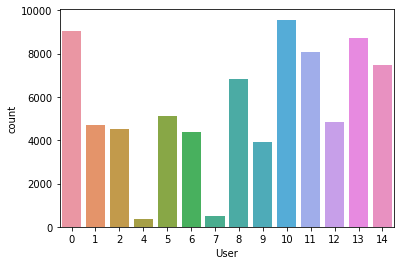

In [7]:
sns.countplot(df['User'])

#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df=pd.read_csv("C:\\Users\\Yuvaraj_Subramanian\\Downloads\\Projects\\Motion Capture Hand Posture\\Postures.csv")
df.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.26388,71.466776,-64.807709,76.895635,42.4625,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [5]:
df.shape

(78096, 38)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

In [7]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,-30.560515
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,35.120329
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,-58.654059
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,-32.352414
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,-0.944786
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


We can see that data is largely spread and we cannot impute the missing values directly by taking mean,median or mode. 

In [8]:
df.corr()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
Class,1.000000,-0.030667,0.080209,0.081808,0.051832,-0.010528,0.144135,0.089894,-0.052351,0.169296,0.095512
User,-0.030667,1.000000,-0.013723,0.070217,0.192016,-0.042628,0.041793,0.183271,-0.059501,0.001024,0.155586
X0,0.080209,-0.013723,1.000000,-0.285254,-0.236433,0.124124,-0.009039,0.033096,0.106164,-0.012656,0.023483
Y0,0.081808,0.070217,-0.285254,1.000000,0.550998,-0.001266,0.133322,0.225545,0.005438,0.082158,0.187781
Z0,0.051832,0.192016,-0.236433,0.550998,1.000000,0.014794,0.209590,0.464174,0.008743,0.149581,0.420451
X1,-0.010528,-0.042628,0.124124,-0.001266,0.014794,1.000000,-0.293786,-0.261213,0.139548,-0.050947,-0.012322
Y1,0.144135,0.041793,-0.009039,0.133322,0.209590,-0.293786,1.000000,0.572763,-0.027720,0.108076,0.184162
Z1,0.089894,0.183271,0.033096,0.225545,0.464174,-0.261213,0.572763,1.000000,-0.009244,0.175152,0.455485
X2,-0.052351,-0.059501,0.106164,0.005438,0.008743,0.139548,-0.027720,-0.009244,1.000000,-0.316701,-0.299826
Y2,0.169296,0.001024,-0.012656,0.082158,0.149581,-0.050947,0.108076,0.175152,-0.316701,1.000000,0.587785


Correlation is useless in this case.

In [9]:
df.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.26388,71.466776,-64.807709,76.895635,42.4625,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


First row contains only 0's

In [10]:
df=df.drop(df.index[0],axis=0)
df.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.46250,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.53853,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


The initial dummy record composed entirely of 0s is removed from the dataset

In [12]:
df.shape

(78095, 38)

In [13]:
df=df.replace('?',np.nan)
df.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.46250,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.53853,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


?'s are replaced with null values in the dataset

#### Handling Null Values

In [14]:
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

To find the null value rows

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
null_columns=df.isnull().any(axis=1)

In [19]:
df[(df['Class']==1)&(df['User']==0)][null_columns]

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,55.581184,71.641201,-63.703137,34.850565,81.352041,-54.747443,77.078512,42.548245,-72.485489,86.8513316833029,68.0118361327612,-71.9099377306975,61.8568469649144,10.851973378857,-68.8537517321284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,0,34.522824,81.457317,-54.900995,55.827687,71.878788,-63.194368,86.902653,68.312680,-71.642074,61.829526515944,11.0149780917446,-68.9587962907051,76.9545074160398,42.7346392143395,-72.500618925002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,0,61.621550,10.968187,-69.134037,32.678173,81.172874,-56.994362,86.732368,68.308089,-71.834003,76.8291921744393,42.7382282883737,-72.6301463414381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0,61.401356,11.014961,-69.379418,32.527643,81.127660,-57.092473,86.421066,68.405649,-72.122161,77.1465460607168,42.8279620708044,-72.2614789078606,55.6097082004233,72.0741963345598,-63.1884658182293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,0,61.436613,10.992838,-69.354632,32.514926,81.082434,-57.074702,87.074330,68.478813,-71.493019,76.9806279078833,42.827033200085,-72.4500771065519,55.7694167992886,72.1202750909472,-62.9503390300175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraneous(Irrelavant) markers were also possible so we are removing the irrelavant marker values as follows

As per the given data
- There should be only '7' marker value for Class 1
- There should be only '11' marker value for Class 2
- There should be only '9' marker value for Class 3
- There should be only '11' marker value for Class 4
- There should be only '11' marker value for Class 5

As there are more than 95% missing values in marker 11 we can drop that column as machine cannot learn with the minimum data in marker 12

In [20]:
df=df.drop(["X11","Y11","Z11"],axis=1)
df.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.46250,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.53853,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#pd.qcut(df['ext price'], q=4)

In [21]:
df['X0'].min()

-108.55273845353399

In [22]:
df['X0'].max()

190.017835268349

In [23]:
df['X0'].mean()

50.34630849916872

Checked the minimum,maximum and mean of the dataset to check if we can impute the missing values by any of the methods.

In [24]:
df1=df[df['Class']==1]
df2=df[df['Class']==2]
df3=df[df['Class']==3]
df4=df[df['Class']==4]
df5=df[df['Class']==5]

#### Class 1

- There should be only '7' marker value for Class 1

In [25]:
df[df['Class']==1].count().head(1)

Class    16265
dtype: int64

In [26]:
df[df['Class']==1].isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         661
Y3         661
Z3         661
X4        2075
Y4        2075
Z4        2075
X5        7074
Y5        7074
Z5        7074
X6       13626
Y6       13626
Z6       13626
X7       16213
Y7       16213
Z7       16213
X8       16217
Y8       16217
Z8       16217
X9       16217
Y9       16217
Z9       16217
X10      16217
Y10      16217
Z10      16217
dtype: int64

#### Imputing missing values only upto 60% of missing value data

In [27]:
df1.iloc[:,0:20].head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.46250,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.53853,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,NaN,NaN,NaN


In [45]:
#df1.iloc[:,0:20].fillna(method='bfill',inplace=True)

#### Backward fill seems like a suitable method 

In [28]:
df1.iloc[:,0:20]=df1.fillna(method='bfill')

In [29]:
df1.iloc[:,20:]=0

Filling the remaining rows with zero's

In [31]:
df1.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.46250,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,86.8077894267762,72.7012329516761,-71.3733905467759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.53853,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,86.8077894267762,72.7012329516761,-71.3733905467759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
df1.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 35 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       77405 non-null object
Y3       77405 non-null object
Z3       77405 non-null object
X4       74975 non-null object
Y4       74975 non-null object
Z4       74975 non-null object
X5       65072 non-null object
Y5       65072 non-null object
Z5       65072 non-null object
X6       52247 non-null object
Y6       52247 non-null object
Z6       52247 non-null object
X7       38943 non-null object
Y7       38943 non-null object
Z7       38943 non-null object
X8       30563 non-null object
Y8       30563 non-null object
Z8       30563 n

Repeating procedure for other classes similar to Class 1

#### Class 2

- There should be only '11' marker value for Class 2

In [34]:
df[df['Class']==2].count().head(1)

Class    14978
dtype: int64

In [35]:
df[df['Class']==2].isnull().sum()

Class       0
User        0
X0          0
Y0          0
Z0          0
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4         28
Y4         28
Z4         28
X5         69
Y5         69
Z5         69
X6        217
Y6        217
Z6        217
X7        310
Y7        310
Z7        310
X8        428
Y8        428
Z8        428
X9       1454
Y9       1454
Z9       1454
X10      4454
Y10      4454
Z10      4454
dtype: int64

In [36]:
df2=df2.fillna(method='bfill')

In [37]:
df2.head(10)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1873,2,0,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,1.064904,80.8548704978587,93.6896556536309,-5.06241126867445,95.207049102694,73.672281767727,-74.3073460949396,58.4213618559222,27.4996336250898,-71.7130805622583,12.6604624171612,95.0771442182526,29.6644340049042,84.1101153748489,151.54545579192,16.8911465319962,79.185591831296,54.7534634130027,-72.4622851172395,20.7300997560106,132.858511745119,35.5012870218578,35.4906561489632,99.7256760026507,22.6901857263241
1874,2,0,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,32.076937,95.2119733344582,73.6653674534711,-74.2523391747689,58.4559327530703,27.4768730172414,-71.6298234950627,20.5736456201095,132.913454933539,35.3492468508872,92.9420438612635,137.182817339274,1.29751114819112,35.4801041417124,99.739019286238,22.8022433141613,83.9369926778121,151.633126133084,16.7184032041115,79.2060450757627,54.7366806396915,-72.4281602990496,13.0238615267003,95.0833057800089,30.1735579072564
1875,2,0,80.775150,93.705283,-5.090904,63.479609,98.429524,11.161413,48.924111,154.340338,31.885853,79.4009525948364,54.8031748081964,-72.1516112457097,93.0548555105223,137.144492079256,1.48733015657086,95.2618622032337,73.7191642501807,-74.2227776379675,20.4994948213986,132.863376821323,35.3095440172938,58.297881935517,27.5838924652418,-71.8884494173925,13.2869415498932,95.0531076216574,30.4914361644636,35.414671333463,99.6930110094474,22.7270895273296,83.5663024020198,151.704825559408,16.3345519273518
1876,2,0,80.618164,93.781461,-5.012812,63.213130,98.462919,11.045095,48.777435,154.327283,32.060452,79.4261804650225,54.9538194596997,-72.1633593552949,35.4189554919847,99.6499615351863,22.9844849874764,93.0739101023824,137.215155719987,1.85911723305493,83.404493413315,151.744359086951,16.5427729189095,95.3148402335739,73.9002534273603,-73.8945054217008,20.6281862949027,132.787591061141,35.8360723613668,58.2066132024663,27.7342294894763,-71.9662633570171,13.2915609232479,95.0172278532442,30.6580617756696
1877,2,0,79.870413,93.921192,-5.628231,79.239570,55.197852,-72.374008,48.446947,154.215388,32.298167,62.6339749550998,98.5061124809839,10.5811197037334,35.2395990351726,99.5402919189644,23.1429136123673,96.2936363893691,74.0934190910654,-72.6830632776891,83.2796887902441,151.629068244219,16.9990590241214,58.0506143046931,27.9802866479134,-72.3797483248211,20.4532027606038,132.633282299618,36.134338579331,93.1188264935228,137.151230490898,2.45108561700727,12.9630869318333,94.8824134758151,30.5525762830332
1878,2,0,79.047726,55.438751,-72.559546,83.598699,151.459461,17.853364,96.926380,74.206724,-71.654743,35.4881662675933,99.3767284401201,23.7725401384369,80.1184543705975,93.8561508560844,-5.06143946322961,62.3096173501646,98.518498390162,10.3649310508984,13.0720350903968,94.7213828334697,30.9533108922808,48.9758796200168,154.059456683209,33.3096981433349,57.8170962715695,28.2039305924657,-72.7290568142745,20.793548171453,132.429076873984,36.8374653446701,93.2873126590097,136.988339936104,2.99005453125864
1879,2,0,78.772453,55.731455,-72.850496,35.652032,99.280239,24.241786,84.010330,151.315526,18.779399,97.4096938342447,74.3662933508579,-70.7519805173937,62.5023996737389,98.4253354048553,10.9209710520149,20.9444868818221,132.294274422235,37.4551659251089,79.9833618054456,93.8591730281439,-5.00880316560645,12.8939348152524,94.6215843439681,30.9722326295772,57.6768633154361,28.4369491306801,-72.9660546281172,93.5019649063801,136.906545617781,3.61639601605685,49.2078255314945,153.904619938596,33.96785524497
1880,2,0,78.659680,55.766704,-72.972699,35.467221,99.209584,23.921834,21.459869,132.157819,38.067704,97.4354095579542,74.3854084362041,-70.6567065743201,84.0410142488259,151.213338004398,18.5794822994538,62.4675574110575,98.360723444827,10.7211773950171,49.4326883325825,153.800489423522,34.1183708585699,79.73459954019

In [38]:
df2.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
dtype: int64

#### Class 3

- There should be only '9' marker value for Class 3

In [39]:
df[df['Class']==3].count().head(1)

Class    16344
dtype: int64

In [40]:
df[df['Class']==3].isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3          22
Y3          22
Z3          22
X4         964
Y4         964
Z4         964
X5        5598
Y5        5598
Z5        5598
X6        9921
Y6        9921
Z6        9921
X7       12788
Y7       12788
Z7       12788
X8       16263
Y8       16263
Z8       16263
X9       16344
Y9       16344
Z9       16344
X10      16344
Y10      16344
Z10      16344
dtype: int64

In [41]:
df3.iloc[:,0:20].head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5
3374,3,0,58.638966,4.894219,-76.641039,53.000355,135.415120,-41.637286,75.431462,20.781456,-87.640325,95.7617987273324,21.04120974572,-92.2082555823174,58.7219930206757,90.8931391960548,-35.6413125326601,NaN,NaN,NaN
3375,3,0,58.425639,4.941919,-76.806993,75.211122,20.806249,-87.818424,53.251095,135.214529,-41.452336,95.7243232375293,20.9783095001945,-92.2264860518201,58.7270918849353,90.81317783945,-35.6307680888082,NaN,NaN,NaN


In [42]:
df3.iloc[:,0:20]=df3.fillna(method='bfill')

In [43]:
df3.iloc[:,20:]=0

In [44]:
df3.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
3374,3,0,58.638966,4.894219,-76.641039,53.000355,135.415120,-41.637286,75.431462,20.781456,-87.640325,95.7617987273324,21.04120974572,-92.2082555823174,58.7219930206757,90.8931391960548,-35.6413125326601,34.9208796626668,95.1973791028701,-27.5173584149367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3375,3,0,58.425639,4.941919,-76.806993,75.211122,20.806249,-87.818424,53.251095,135.214529,-41.452336,95.7243232375293,20.9783095001945,-92.2264860518201,58.7270918849353,90.81317783945,-35.6307680888082,34.9208796626668,95.1973791028701,-27.5173584149367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Class 4

- There should be only '11' marker value for Class 4

In [45]:
df[df['Class']==4].count().head(1)

Class    14775
dtype: int64

In [46]:
df[df['Class']==4].isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           1
Y3           1
Z3           1
X4           6
Y4           6
Z4           6
X5         197
Y5         197
Z5         197
X6        1757
Y6        1757
Z6        1757
X7        9008
Y7        9008
Z7        9008
X8       12426
Y8       12426
Z8       12426
X9       14762
Y9       14762
Z9       14762
X10      14775
Y10      14775
Z10      14775
dtype: int64

In [47]:
df4.iloc[:,0:23].head(3)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
5225,4,0,65.239490,83.085992,-46.213736,51.855493,135.408448,-69.876265,42.176343,25.332000,-75.697410,-7.13620643136008,71.2636374377785,-49.7258366293415,70.8102885110408,126.364826000383,-59.6274550665704,44.8316003208485,89.8437951532514,-38.312265392969,NaN,NaN,NaN
5226,4,0,-7.415363,70.950040,-50.341087,52.008040,135.333630,-69.983664,72.116395,126.939085,-58.962251,45.0482339976966,89.891004686451,-38.3531919851619,65.1609849786778,82.8661302858905,-46.442519050729,42.6339449293983,25.1837522768945,-75.4689028447926,NaN,NaN,NaN
5227,4,0,-3.596302,68.068262,-53.952567,56.667566,132.601060,-78.109749,69.287267,82.370643,-50.460330,74.9249944171196,124.588379439551,-67.651206761011,49.2561231200421,89.6947099926916,-42.9925388353629,6.43749310302483,26.7077729951845,1.58237580435181,47.4199113950179,21.8823688496878,-74.2803618853252


In [48]:
df4.iloc[:,0:23]=df4.fillna(method='bfill')

In [49]:
df4.iloc[:,23:]=0

In [50]:
df4.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
5225,4,0,65.239490,83.085992,-46.213736,51.855493,135.408448,-69.876265,42.176343,25.332000,-75.697410,-7.13620643136008,71.2636374377785,-49.7258366293415,70.8102885110408,126.364826000383,-59.6274550665704,44.8316003208485,89.8437951532514,-38.312265392969,47.4199113950179,21.8823688496878,-74.2803618853252,0,0,0,0,0,0,0,0,0,0,0,0
5226,4,0,-7.415363,70.950040,-50.341087,52.008040,135.333630,-69.983664,72.116395,126.939085,-58.962251,45.0482339976966,89.891004686451,-38.3531919851619,65.1609849786778,82.8661302858905,-46.442519050729,42.6339449293983,25.1837522768945,-75.4689028447926,47.4199113950179,21.8823688496878,-74.2803618853252,0,0,0,0,0,0,0,0,0,0,0,0


#### Class 5

- There should be only '11' marker value for Class 5

In [51]:
df[df['Class']==5].count().head(1)

Class    15733
dtype: int64

In [52]:
df[df['Class']==5].isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           6
Y3           6
Z3           6
X4          47
Y4          47
Z4          47
X5          85
Y5          85
Z5          85
X6         327
Y6         327
Z6         327
X7         833
Y7         833
Z7         833
X8        2198
Y8        2198
Z8        2198
X9        5351
Y9        5351
Z9        5351
X10      11553
Y10      11553
Z10      11553
dtype: int64

In [53]:
df5.iloc[:,0:32].head(3)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9
7006,5,0,62.004630,78.750712,-98.263840,51.147173,24.963260,-75.035986,-19.141342,126.860540,-36.673226,72.3272772532996,131.363645507798,-57.7496249315124,-14.2193380905175,98.6835039139976,-4.0755681218979,61.0233277479384,100.99722619639,-2.9120183526653,19.2700529886454,105.679012595953,4.44926605459869,55.2509880182551,54.5544376744873,-93.9926375826829,75.9194127409986,92.0701943020497,-31.2948657582465,50.1238165883967,137.966870037136,-41.4223244624914
7007,5,0,62.821625,78.910349,-97.589286,52.075917,25.019958,-74.224158,-19.121421,127.098140,-36.615404,-13.3184263531704,98.4987601121529,-3.12933123565354,73.2273262628577,131.306777626618,-56.6265708896617,19.7207199131491,105.648577981694,5.04393963215095,61.4871262469671,100.897836593646,-2.14786796656022,77.5381825012854,91.6984474497147,-29.3206324708641,56.2857174669528,54.6565523767015,-93.0225947737299,50.7875758282079,137.959088515689,-40.5883724223298
7008,5,0,63.055331,78.691608,-97.398343,52.661113,24.777167,-73.617553,-18.805811,126.918704,-36.344193,-12.4502191877779,98.2731747982145,-2.33387455887963,20.3925309650433,105.549710881322,5.50130913759869,77.9185457227318,91.6452604829452,-29.1200865305362,61.9260180938943,100.886743809927,-1.96909625622724,56.7523921981914,54.3861320719262,-92.5132833035243,51.2693874735899,137.804544713208,-40.3000733855929,73.7671115076527,131.10768653808,-56.3125283846121


In [54]:
df5.iloc[:,0:32]=df5.fillna(method='bfill')

In [55]:
df5.iloc[:,32:]=0

In [56]:
df5.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
7006,5,0,62.004630,78.750712,-98.263840,51.147173,24.963260,-75.035986,-19.141342,126.86054,-36.673226,72.3272772532996,131.363645507798,-57.7496249315124,-14.2193380905175,98.6835039139976,-4.0755681218979,61.0233277479384,100.99722619639,-2.9120183526653,19.2700529886454,105.679012595953,4.44926605459869,55.2509880182551,54.5544376744873,-93.9926375826829,75.9194127409986,92.0701943020497,-31.2948657582465,50.1238165883967,137.966870037136,-41.4223244624914,0,0,0
7007,5,0,62.821625,78.910349,-97.589286,52.075917,25.019958,-74.224158,-19.121421,127.09814,-36.615404,-13.3184263531704,98.4987601121529,-3.12933123565354,73.2273262628577,131.306777626618,-56.6265708896617,19.7207199131491,105.648577981694,5.04393963215095,61.4871262469671,100.897836593646,-2.14786796656022,77.5381825012854,91.6984474497147,-29.3206324708641,56.2857174669528,54.6565523767015,-93.0225947737299,50.7875758282079,137.959088515689,-40.5883724223298,0,0,0


In [57]:
df5.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
dtype: int64

In [58]:
dfn=pd.concat([df1,df2,df3,df4,df5])
dfn.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.46250,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,86.8077894267762,72.7012329516761,-71.3733905467759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.53853,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,86.8077894267762,72.7012329516761,-71.3733905467759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


concating all into a single data frame

In [59]:
dfn.count().head(1)

Class    78095
dtype: int64

In [60]:
dfn.iloc[:,11:].head(2)

,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,86.8077894267762,72.7012329516761,-71.3733905467759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,86.8077894267762,72.7012329516761,-71.3733905467759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
dfn2=dfn.copy()

In [62]:
dfn2.X3=pd.to_numeric(dfn2.X3)
dfn2.Y3=pd.to_numeric(dfn2.Y3)
dfn2.Z3=pd.to_numeric(dfn2.Z3)
dfn2.X4=pd.to_numeric(dfn2.X4)
dfn2.Y4=pd.to_numeric(dfn2.Y4)
dfn2.Z4=pd.to_numeric(dfn2.Z4)
dfn2.X5=pd.to_numeric(dfn2.X5)
dfn2.Y5=pd.to_numeric(dfn2.Y5)
dfn2.Z5=pd.to_numeric(dfn2.Z5)
dfn2.X6=pd.to_numeric(dfn2.X6)
dfn2.Y6=pd.to_numeric(dfn2.Y6)
dfn2.Z6=pd.to_numeric(dfn2.Z6)
dfn2.X7=pd.to_numeric(dfn2.X7)
dfn2.Y7=pd.to_numeric(dfn2.Y7)
dfn2.Z7=pd.to_numeric(dfn2.Z7)
dfn2.X8=pd.to_numeric(dfn2.X8)
dfn2.Y8=pd.to_numeric(dfn2.Y8)
dfn2.Z8=pd.to_numeric(dfn2.Z8)
dfn2.X9=pd.to_numeric(dfn2.X9)
dfn2.Y9=pd.to_numeric(dfn2.Y9)
dfn2.Z9=pd.to_numeric(dfn2.Z9)
dfn2.X10=pd.to_numeric(dfn2.X10)
dfn2.Y10=pd.to_numeric(dfn2.Y10)
dfn2.Z10=pd.to_numeric(dfn2.Z10)

In [63]:
dfn2.head(2)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.46250,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781,86.807789,72.701233,-71.373391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.53853,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418,86.807789,72.701233,-71.373391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
dfn2.count().head(1)

Class    78095
dtype: int64

In [65]:
dfn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 35 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       78095 non-null float64
Y3       78095 non-null float64
Z3       78095 non-null float64
X4       78095 non-null float64
Y4       78095 non-null float64
Z4       78095 non-null float64
X5       78095 non-null float64
Y5       78095 non-null float64
Z5       78095 non-null float64
X6       78095 non-null float64
Y6       78095 non-null float64
Z6       78095 non-null float64
X7       78095 non-null float64
Y7       78095 non-null float64
Z7       78095 non-null float64
X8       78095 non-null float64
Y8       78095 non-null float64

In [66]:
df.count().head(1)

Class    78095
dtype: int64

In [67]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 35 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       78095 non-null object
Y3       78095 non-null object
Z3       78095 non-null object
X4       78095 non-null object
Y4       78095 non-null object
Z4       78095 non-null object
X5       78095 non-null object
Y5       78095 non-null object
Z5       78095 non-null object
X6       78095 non-null object
Y6       78095 non-null object
Z6       78095 non-null object
X7       78095 non-null object
Y7       78095 non-null object
Z7       78095 non-null object
X8       78095 non-null object
Y8       78095 non-null object
Z8       78095 n

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 35 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       77405 non-null object
Y3       77405 non-null object
Z3       77405 non-null object
X4       74975 non-null object
Y4       74975 non-null object
Z4       74975 non-null object
X5       65072 non-null object
Y5       65072 non-null object
Z5       65072 non-null object
X6       52247 non-null object
Y6       52247 non-null object
Z6       52247 non-null object
X7       38943 non-null object
Y7       38943 non-null object
Z7       38943 non-null object
X8       30563 non-null object
Y8       30563 non-null object
Z8       30563 n

#### Converted the New dataset into .csv file for further processing

In [106]:
dfn2.to_csv(r'C:\Users\Yuvaraj_Subramanian\Downloads\Projects\Motion Capture Hand Posture\UpdatedPostures.csv', index = False,header = True)